### Yolo detect_Video

In [ ]:
pwd

In [ ]:
!python ./detect.py --weights ./weights/barcode/exp3/weights/best.pt --source ./weights/barcode/exp3/weights/vid_01.mp4 --conf 0.8

### Yolo Images in a directory

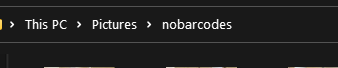

In [ ]:
!python ./detect.py --weights ./weights/barcode/exp3\weights\best.pt --source C:\Users\Quadrep\Documents\new_dataset_2\ --iou 0.1

In [ ]:
pwd

##### usage of yolo real time using Torch hub

(18, 4)
0
1


Using cache found in C:\Users\Quadrep/.cache\torch\hub\ultralytics_yolov5_master
Fusing layers... 
C:\Users\Quadrep\miniconda3\envs\yolov5\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7056607 parameters, 0 gradients
Adding AutoShape... 
YOLOv5  2021-6-27 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24576.0MB)



<class 'models.common.AutoShape'>


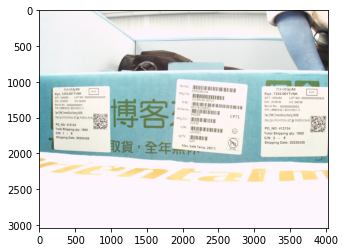

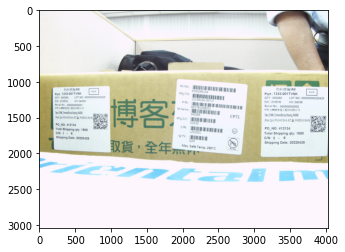

RuntimeError: The size of tensor a (80) must match the size of tensor b (164) at non-singleton dimension 3

In [1]:
import cv2
import torch
from PIL import Image
import cv2
import torch
from PIL import Image
import glob
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.image as mpimg
import os
from pyzbar.pyzbar import decode
from pyzbar import pyzbar
import cv2
import glob
from tqdm import tqdm
from barcode import EAN13
from barcode.writer import ImageWriter
import matplotlib.pyplot as plt

import cv2
import torch
from PIL import Image


%matplotlib inline


#print(os.getcwd())

def scaleTuple(xxx, factor):
    a = list(xxx)
    b = [i * factor for i in a]
    #c = tuple(b)

    return (b[0],b[1])

a = scaleTuple((9,2),2)

print(a)


def tupleAddition(tuple1, tuple2):
    a = list(tuple1)
    b = list(tuple2)
    c = []
    for ai,bi in zip(a,b):
        c.append(ai+bi)

    return tuple(c)


def FloatToInt (floatOrDecimal):
    lower = int(floatOrDecimal)
    upper = lower+1

    upperDifference = upper - floatOrDecimal
    lowerDifference  = floatOrDecimal - lower

    finalScore = 0

    if (upperDifference <= lowerDifference):
        finalScore = upper
    elif (upperDifference > lowerDifference):
        finalScore = lower

    return finalScore


files = glob.glob('./data_camera//*.png')
print(len(files))

another_files = glob.glob('./data_camera/*.jpg')



for file in another_files:
    files.append(file)
    
    
print(len(files))

#print(len(files))
#files

model = torch.hub.load('ultralytics/yolov5', 'custom', path='./weights/barcode/exp15/weights/best.pt')
model.iou = 0.1
print(type(model))


%matplotlib inline
plt.imshow(cv2.imread(files[0])[:,:,::-1])


img2 = cv2.imread(files[0])
#img2.shape
test_image = img2[:,:,::-1]
plt.imshow(img2)
plt.show()
plt.imshow(test_image)
plt.show()

img2 = cv2.imread(files[0])  # OpenCV image (BGR tofiles[0] RGB)
imgs = [ img2]  # batch of images

for i in range (len(imgs)):
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
    
results = model(np.copy(img2))  # includes NMS, #using npcopy

In [ ]:
# Model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#model = torch.hub.load('ultralytics/yolov5', 'custom', path='./weights/barcode/exp3/weights/best.pt')

# Images




# Inference


# Results
results.print()  
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
df = results.pandas().xyxy[0]

#img2 = cv2.imread(files[4])  # OpenCV image (BGR tofiles[0] RGB)
#imgs = [ img2]  # batch of images

df = results.pandas().xyxy[0]
print(len(df))
print(df)


class Label:
    def __init__(self,  boundPoints = None, labelImage = None, originCoordinate = None):
        self.boundPoints = boundPoints
        self.labelImage = labelImage
        self.originCoordinate = originCoordinate
        self.barcodeReadStatus = False
    
        #magnified 
        self.magnifiedImage = None
        self.magnificationFactor = 1
        
        #binarized image
        self.binarizedImage = None

        #decoded barcode
        self.barcodeList = []
        
        #bounding box
        self.boundingBox = None

bounding_box_list = []
stickers_list = []
image = np.copy(imgs[0])

if (len(df) >0):
    print('labels found')
    
    for i in range(len(df)):
        xmin = int(df.iloc[i].xmin)
        ymin = int(df.iloc[i].ymin)
        xmax = int(df.iloc[i].xmax)
        ymax = int(df.iloc[i].ymax)
        
        bbox = [(xmin, ymin),(xmax, ymin), (xmin, ymax), (xmax, ymax)]                                                          
        bounding_box_list.append(bbox)
        
        #2. determining 
        stickers_list.append(Label(bbox,image[ymin:ymax,xmin:xmax], (xmin, ymin)))
            
        
else:
    print('no label found')
    
print(len(bounding_box_list))
print(bounding_box_list)


i = 0
for item in stickers_list:
    xmin = int(df.iloc[i].xmin)
    ymin = int(df.iloc[i].ymin)
    xmax = int(df.iloc[i].xmax)
    ymax = int(df.iloc[i].ymax)
    
    item.boundingBox = [(xmin, ymin), (xmax, ymax)] 
    i+=1


for item in stickers_list[0].boundingBox:
    scaleTuple(item,2)


for i in range(len(stickers_list)):
    plt.imshow(stickers_list[i].labelImage[:,:,::-1])
    plt.show()

#### 3 separated objects: Label, Barcode, BBox

###### write

### Individual stickers
- 1. Image enlarging, factor = 2-3
- 2. binarizing image
- 3. decoding barcode

In [ ]:
# enlarging image 3x
import cv2

def zoom(label, zoom_factor=1):
    label.magnificationFactor = zoom_factor
    label.magnifiedImage = cv2.resize(np.copy(label.labelImage), None, fx=zoom_factor, fy=zoom_factor)
    #return image

for item in stickers_list:
    #item.magnificationFactor = 2
    #item.magnifiedImage = zoom(item.labelImage, item.magnificationFactor)
    zoom(item, 2)


#binarizing
def binarizeImage (image, tresh_value = 45):
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, tresh_value, 255, cv2.THRESH_BINARY)
    #plt.imshow(blackAndWhiteImage)
    return blackAndWhiteImage

for item in stickers_list:
    #item.binarizedImage = binarizeImage (item.magnifiedImage, 90)
    item.binarizedImage = binarizeImage (item.magnifiedImage, 180)

#cv2.imwrite('./test.jpg', stickers_list[0].binarizedImage)

class Barcode:
    def __init__(self,  barcodeContent, barcodeType, fakeCoordinate, originAddress):
        self.barcodeContent = barcodeContent
        self.barcodeType = barcodeType
        self.fakeCoordinate = fakeCoordinate
        self.realCoordinate = []
        self.originAddress = originAddress
        self.boundingBox = None
        self.magnificationFactor = 1

class BoundingBox:
     def __init__(self, initPosition, finalPosition, theText):
         self.initPosition = initPosition
         self.finalPosition = finalPosition
         self.theText = theText
         self.color = (0,0,255)

###### 1. . Magnifying

#### 02. Binarizing

#### 03. Barcode decoding from each labels

In [ ]:
#design the function first

def readBarcode (labelObject): 
    barcodes = decode(labelObject.binarizedImage)
    

    if (len(barcodes) > 0):
        print ('Barcode detected')
        k = 0
        for barcode in tqdm(barcodes):
        
            (x, y, w, h) = barcode.rect
        #cv2.rectangle(originalImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
            barcodeData = barcode.data.decode("utf-8")
            barcodeType = barcode.type
            barcode_object = Barcode(barcodeData, barcodeType, [(x, y), (x + w, y + h)], labelObject.boundPoints[0])
        
            labelObject.barcodeList.append(barcode_object)
        
        #list_locationPoints.append(((x, y), (x + w, y + h)))
        
        #list_barcodeData.append(barcodeData)
        
        #list_barcodeType.append(barcodeType)
            
            text = "{} ({})".format(barcodeData, barcodeType)
        
        #text = "{}".format(barcodeData)
            bbObject = BoundingBox((x, y), (x + w, y + h), text)
        
            labelObject.barcodeList[k].boundingBox = bbObject
        
            cv2.putText(labelObject.magnifiedImage, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            k +=1

    else:
        print ('Barcode not detected')
    
print('Function setting finished')


# Read all barcode
for item in tqdm(stickers_list):
    readBarcode (item)

i = 0
for item in stickers_list:
    plt.imshow(item.magnifiedImage[:,:,::-1])
    plt.show()
    cv2.imwrite('test'+str(i)+'.jpg', item.magnifiedImage)
    i+=1